Solve by using Newton's method:

1. x^3 + 3y^2 = 21
2. x^2 + 2y + 2 = 0

Make sketches of the graphs to locate approximate values of the intersections

In [1]:
import numpy as np
from naf.linalg_exp import gecr, crsv, set_options
import math
from matplotlib import pyplot as plt

set_options(precision=5)

In [2]:
f1 = lambda x,y: x**3 + 3*y**2 - 21.0
f2 = lambda x,y: x**2 +2*y + 2.0

dxf1 = lambda x,y: 3*x**2
dyf1 = lambda x,y: 6*y

dxf2 = lambda x,y: 2*x
dyf2 = lambda x,y: 2

def a_m(w):
    x = w[0]
    y = w[1]
    
    return np.array([[dxf1(x,y), dyf1(x,y)],
                     [dxf2(x,y), dyf2(x,y)]])

def b_m(w):
    x = w[0]
    y = w[1]
    
    return np.array([f1(x,y), f2(x,y)])

def two_eq_newton(x0, verbose=False):
    
    tol = 0.0001
    dx = np.array([tol*10, tol*10])
    num_iter = 0
    max_iter = 20
    
    while (abs(dx[0]) > tol and abs(dx[1]) > tol) and num_iter < max_iter:
        a = a_m(x0)
        b = -1*b_m(x0)
        
        lu,ov = gecr(a)
        dx = crsv(lu, ov, b)[ov]
        
        x0 = x0 + dx
        num_iter += 1
        
        if verbose:
            pass
        
    return x0, dx, num_iter
    
w1 = np.array([2.0, -3.0])
x1, dx1, ni1 = two_eq_newton(w1)
print(x1, dx1, ni1)

print('\n')
w2 = np.array([-3.0, -5.0])
x2, dx2, ni2 = two_eq_newton(w2)
print(x2, dx2, ni2)
    

[ 1.64303805 -2.34978702] [-1.62256798e-06  7.37224112e-07] 4


[-2.0792981  -3.16174029] [ 4.92282784e-05 -5.73932786e-05] 4


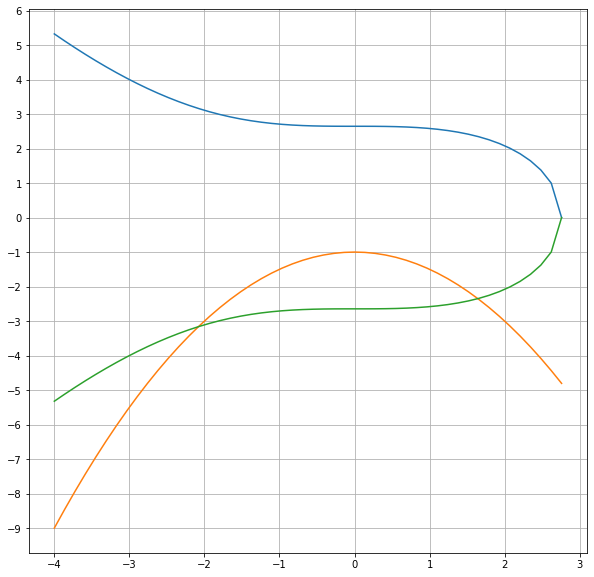

In [3]:
f1 = lambda x: math.sqrt((21 - x**3)/3.0)
    
f1p = lambda x: -1*math.sqrt((21 - x**3)/3.0)
    
f2 = lambda x: (-2 - x**2)/2

vf1 = np.vectorize(f1)
vf1p = np.vectorize(f1p)
vf2 = np.vectorize(f2)

xrange = np.linspace(-4.0,math.pow(21,1/3))
yticks = np.linspace(-10.0,6.0,17)

fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
ax.set_yticks(yticks)
ax.plot(xrange, vf1(xrange), xrange, vf2(xrange), xrange, vf1p(xrange))
plt.show()